# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.9305,  0.0643,  0.6584,  0.1006,  0.2313,  0.3854,  0.1546,  0.5983,  0.1679,  0.6053,
        0.8129,  0.7752,  0.2247,  0.1457,  0.7345,  0.8624,  0.215 ,  0.7859,  0.3491,  0.5585,
        0.4212,  0.6374,  0.8183,  0.1461,  0.7832,  0.898 ,  0.4985,  0.8631,  0.2586,  0.0206])

In [6]:
y

array([ 10.7914,   8.193 ,   9.9752,   8.3019,   8.6939,   9.1562,   8.4637,   9.795 ,   8.5037,
         9.8158,  10.4386,  10.3257,   8.674 ,   8.4372,  10.2036,  10.5871,   8.6451,  10.3578,
         9.0474,   9.6756,   9.2635,   9.9122,  10.4549,   8.4383,  10.3496,  10.6939,   9.4956,
        10.5892,   8.7757,   8.0619])

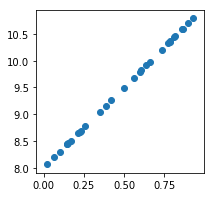

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.0364

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

In [13]:
import matplotlib.animation as animation
print(animation.writers.list())

['ffmpeg', 'ffmpeg_file', 'avconv', 'avconv_file', 'html']
